In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score, accuracy_score, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
# Link of dataset: https://www.kaggle.com/datasets?search=house+prices+in+iowa


In [2]:
df_house_prices_train = pd.read_csv('/content/sample_data/train.csv')
df_house_prices_test = pd.read_csv('/content/sample_data/test.csv')
#df_clustering = pd.read_csv('/content/sample_data/CC GENERAL.csv')

Association rules Support: As the name implies, it's how often a thing we follow happens (a fraud in card transactions) - percentage Confidence: As the name implies, how confident are we in the rule above? It's like the strength of the rule - percentage

Example: A: purchase of high-value electronics B: same-day shipping support = 0.05% confidence = 80% Interpretation: from all transactions of electronics, 0.5% are classified as high value (probably over a specific amount - 5000$ let's say) Out of these, a high number had the shipping in the same day, suggesting fraudulous movement (people want to sell them as quickly as possible)

In [3]:
############################################################################################################################################

## Data description - clustering dataset (Credit card transactions)

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [4]:
########################################################################################################################################################################

# Linear Regression

## Data description


In [5]:
#Let's see more statistics regarding our training data
df_house_prices_train.describe()

#To be noted that we only see 38 rows here - which means that only these 38 are numerical and the other 42 are of type object/string.
#So, in order to make a linear regression on this data frame, we either have to remove all columns that are not numerical (half the dataset - quite a lot - can heavily influence the results)
#We will then use the <<one-hot encoding>> method to transform the categorial data into numerical - by assigning 0s and 1s, according to the category they fit in. 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Correlation matrix & visualization

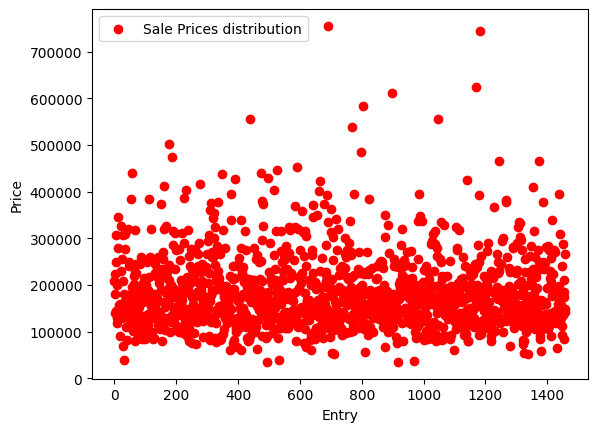

In [6]:
# Plot again actual vs predicted values
# Generate indices for the data points
indices = np.arange(len(df_house_prices_train["SalePrice"]))
plt.scatter(indices, df_house_prices_train["SalePrice"], color='red', label='Sale Prices distribution')

# Set labels and legend
plt.xlabel('Entry')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

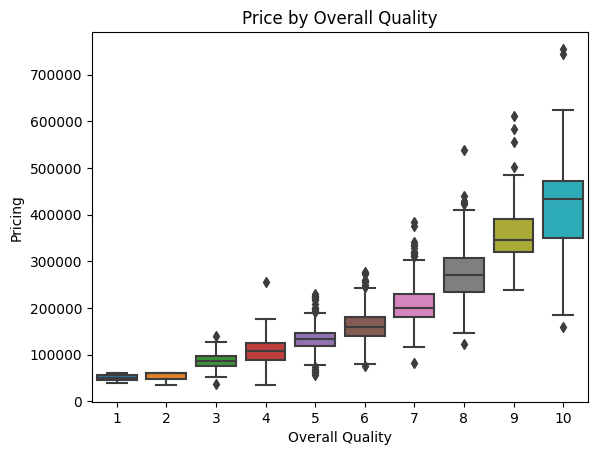

In [7]:
#Boxplot of SalePrice by OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=df_house_prices_train)
plt.title('Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Pricing')
plt.show()

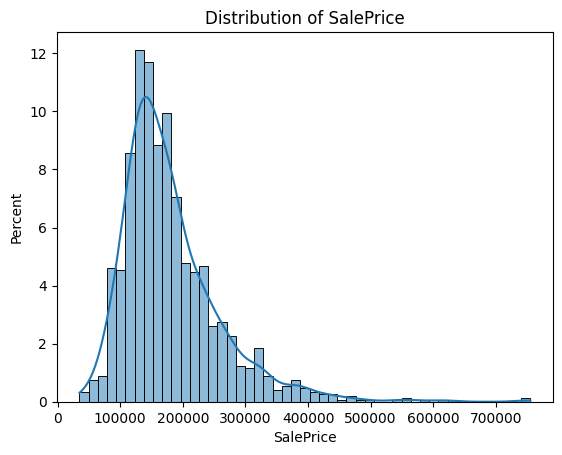

In [8]:
#Histogram of SalePrice
sns.histplot(df_house_prices_train['SalePrice'], kde=True, stat="percent") #kde - kernel density estimation - that smooth line
plt.title('Distribution of SalePrice')
plt.show()

## Cleaning

In [9]:
#Also, very important, we have to fill the empty values in the training and testing data frames so that we don't screw the model
df_house_prices_train = df_house_prices_train.fillna(df_house_prices_train.median())
df_house_prices_test = df_house_prices_test.fillna(df_house_prices_test.median())

<ipython-input-9-f562fdbdf45d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house_prices_train = df_house_prices_train.fillna(df_house_prices_train.median())
<ipython-input-9-f562fdbdf45d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house_prices_test = df_house_prices_test.fillna(df_house_prices_test.median())


In [10]:
original_shape = df_house_prices_train.shape

In [11]:
# We check for outliers through the numerical features only.
numerical_features = df_house_prices_train.select_dtypes(include=['int', 'float']).columns

outlier_counts = {}
for column in numerical_features:
    # Calculate the IQR
    Q1 = df_house_prices_train[column].quantile(0.25)
    Q3 = df_house_prices_train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers for the feature
    outliers = df_house_prices_train[(df_house_prices_train[column] < lower_bound) | (df_house_prices_train[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

# Calculate the total outlier count for each feature
total_outlier_counts = {feature: count for feature, count in outlier_counts.items()}

# Sort the features based on the total outlier count
sorted_features = sorted(total_outlier_counts.items(), key=lambda x: x[1], reverse=True)

# Print the features with the most outliers
for feature, count in sorted_features:
    print(f"Feature: {feature}, Total Number of Outliers: {count}")


Feature: EnclosedPorch, Total Number of Outliers: 208
Feature: BsmtFinSF2, Total Number of Outliers: 167
Feature: OverallCond, Total Number of Outliers: 125
Feature: ScreenPorch, Total Number of Outliers: 116
Feature: LotFrontage, Total Number of Outliers: 106
Feature: MSSubClass, Total Number of Outliers: 103
Feature: MasVnrArea, Total Number of Outliers: 98
Feature: BsmtHalfBath, Total Number of Outliers: 82
Feature: OpenPorchSF, Total Number of Outliers: 77
Feature: LotArea, Total Number of Outliers: 69
Feature: KitchenAbvGr, Total Number of Outliers: 68
Feature: TotalBsmtSF, Total Number of Outliers: 61
Feature: SalePrice, Total Number of Outliers: 61
Feature: MiscVal, Total Number of Outliers: 52
Feature: BedroomAbvGr, Total Number of Outliers: 35
Feature: WoodDeckSF, Total Number of Outliers: 32
Feature: GrLivArea, Total Number of Outliers: 31
Feature: TotRmsAbvGrd, Total Number of Outliers: 30
Feature: BsmtUnfSF, Total Number of Outliers: 29
Feature: LowQualFinSF, Total Number o

In [12]:
# We will perform IQR on the first 7 features (with the most outliers)

top_features = ['EnclosedPorch', 'BsmtFinSF2', 'OverallCond', 'ScreenPorch', 'LotFrontage', 'MSSubClass', 'MasVnrArea']

for feature in top_features:
    Q1 = df_house_prices_train[feature].quantile(0.25)
    Q3 = df_house_prices_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_house_prices_train = df_house_prices_train[(df_house_prices_train[feature] >= lower_bound) & (df_house_prices_train[feature] <= upper_bound)]

# Check the shape of the resulting DataFrame without outliers
print("Shape of data with outliers:", original_shape)
print("Shape of data without outliers:", df_house_prices_train.shape)

Shape of data with outliers: (1460, 81)
Shape of data without outliers: (798, 81)


In [13]:
df_house_prices_train.reset_index(drop=True, inplace=True)
print(df_house_prices_train)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0       1          60       RL         65.0     8450   Pave   NaN      Reg   
1       3          60       RL         68.0    11250   Pave   NaN      IR1   
2       5          60       RL         84.0    14260   Pave   NaN      IR1   
3       6          50       RL         85.0    14115   Pave   NaN      IR1   
4       7          20       RL         75.0    10084   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
793  1451          90       RL         60.0     9000   Pave   NaN      Reg   
794  1452          20       RL         78.0     9262   Pave   NaN      Reg   
795  1454          20       RL         90.0    17217   Pave   NaN      Reg   
796  1455          20       FV         62.0     7500   Pave  Pave      Reg   
797  1456          60       RL         62.0     7917   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeatu

In [14]:
y_train = df_house_prices_train[['SalePrice']].copy()
x_train = df_house_prices_train.drop(['SalePrice'], axis=1)

<ipython-input-15-e058fba469ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = x_train.corr()


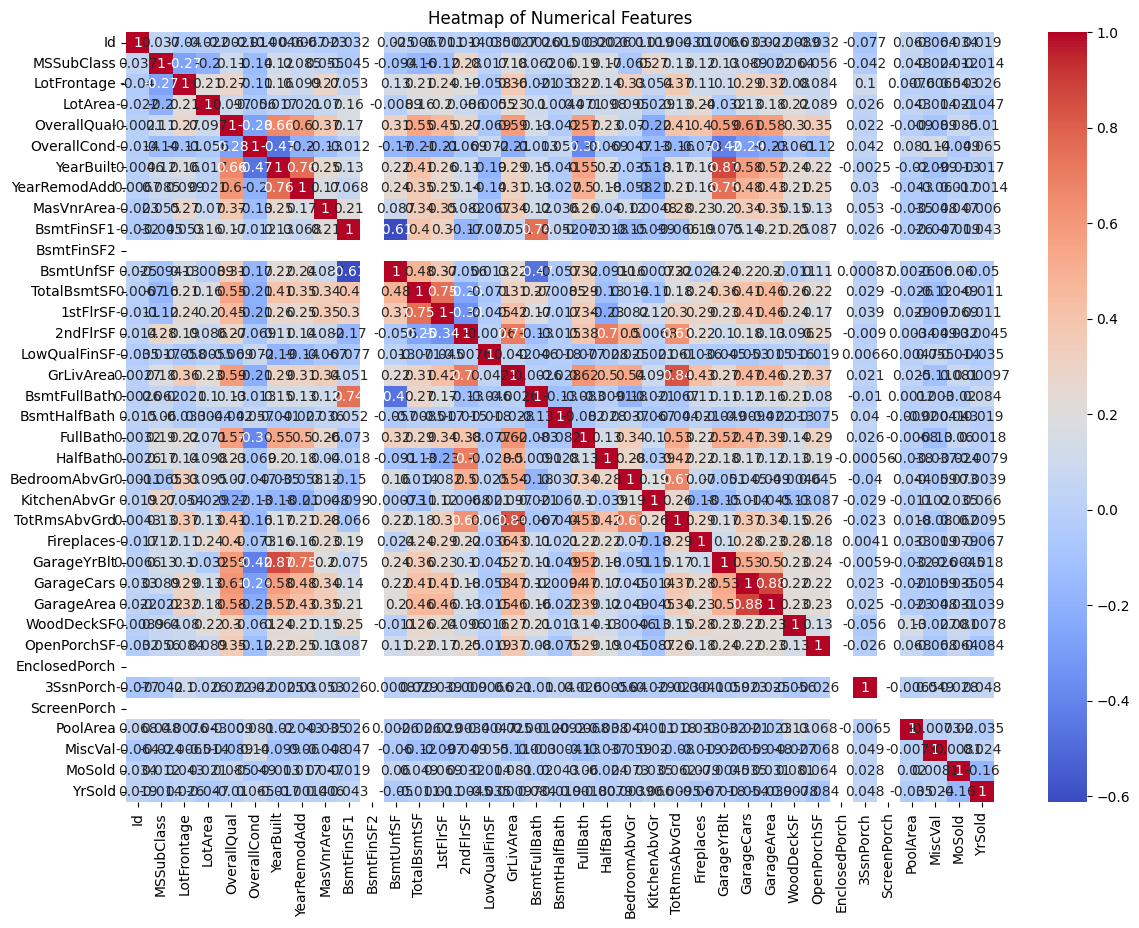

In [15]:
# Correlation matrix for dataframe without outliers
corr = x_train.corr()
plt.figure(figsize=(14, 10)) 
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Heatmap of Numerical Features')
plt.show()

In [16]:
# Now we want to remove features that are highly correlated so it doesn't influence our model

# Set thresholds
positive_threshold = 0.6
negative_threshold = -0.36

# Create a copy of the correlation matrix
corr_copy = corr.copy()

# Create an empty set to store the features to remove
features_to_remove = set()

# Iterate over the correlation matrix and identify highly correlated features
for feature in corr.columns:
    # Positive correlations
    positive_correlated_features = corr.index[(corr[feature] > positive_threshold) & (corr[feature] < 1.0)]
    features_to_remove.update(positive_correlated_features)
    
    # Negative correlations
    negative_correlated_features = corr.index[(corr[feature] < negative_threshold) & (corr[feature] > -1.0)]
    features_to_remove.update(negative_correlated_features)

# Remove the chosen features from the dataset
x_train_final = x_train.drop(features_to_remove, axis=1)

# Check the shape of the cleaned dataset
print("Shape of original dataset:", original_shape)
print("Shape of x_75 before correlation removal:", x_train.shape)
print("Shape of x_75_final (after correlation removal):", x_train_final.shape)

Shape of original dataset: (1460, 81)
Shape of x_75 before correlation removal: (798, 80)
Shape of x_75_final (after correlation removal): (798, 62)


In [17]:
# We have removed 19 features that were highly correlated. We can now perform one-hot encoding and scaling.

In [18]:
#One-hot encoding
#x_train_final = pd.get_dummies(x_train_final)

# We want to see all columns of the final training data frame - we will need to see clearly what we work with, so we can make the model; we have the "SalePrice" column.
#print(x_train_final.columns.tolist())

In [19]:
# We tried one-hot encoding and it's too much to clean for the time being;  we'll just stick with the numerical features 
x_train_final = x_train_final.select_dtypes(include=['number'])

In [20]:
# Normalization
scaler = MinMaxScaler()
x_train_final = pd.DataFrame(scaler.fit_transform(x_train_final), columns=x_train_final.columns)

print(x_train_final)

           Id  MSSubClass  LotFrontage   LotArea  MasVnrArea  BsmtFinSF2  \
0    0.000000         0.4       0.4375  0.049554    0.435556         0.0   
1    0.001375         0.4       0.4750  0.074495    0.360000         0.0   
2    0.002749         0.4       0.6750  0.101308    0.777778         0.0   
3    0.003436         0.3       0.6875  0.100016    0.000000         0.0   
4    0.004124         0.0       0.5625  0.064109    0.413333         0.0   
..        ...         ...          ...       ...         ...         ...   
793  0.996564         0.7       0.3750  0.054453    0.000000         0.0   
794  0.997251         0.0       0.6000  0.056787    0.431111         0.0   
795  0.998625         0.0       0.7500  0.127648    0.000000         0.0   
796  0.999313         0.0       0.4000  0.041091    0.000000         0.0   
797  1.000000         0.4       0.4000  0.044806    0.000000         0.0   

     LowQualFinSF  BsmtHalfBath  KitchenAbvGr  Fireplaces  WoodDeckSF  \
0             

In [21]:
# Model
# Split the refined dataset for further processing

#So we'll split the training set in a 75/25 ratio (75% for actual training, 25% for evaluating the model) 
x_train_final_75, x_train_final_25 = train_test_split(x_train_final, test_size=0.25, random_state=42)
y_train_final_75, y_train_final_25 = train_test_split(y_train, test_size=0.25, random_state=42)

In [22]:
x_train_final_25.reset_index(drop=True, inplace=True)
y_train_final_25.reset_index(drop=True, inplace=True)

In [23]:
# Train the model (just the training set)
model = LinearRegression()
model.fit(x_train_final_75, y_train_final_75)

# Let's see coefficients and the intercept
print(model.intercept_)

[114589.69611522]


In [24]:
coefficients = pd.DataFrame({'Feature': x_train_final_75.columns, 'Coeff': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coeff', ascending=False)
print("10 largest coefficients:", coefficients.head(10))
print("10 smallest coefficients:", coefficients.tail(10))

10 largest coefficients:         Feature          Coeff
3       LotArea  141201.892494
11  OpenPorchSF  112033.807088
2   LotFrontage   94418.730464
10   WoodDeckSF   83338.306809
9    Fireplaces   67393.817805
4    MasVnrArea   59317.734388
1    MSSubClass   26913.529048
17       MoSold    5401.939520
18       YrSold    3885.528319
0            Id    3857.014625
10 smallest coefficients:           Feature         Coeff
0              Id  3.857015e+03
13      3SsnPorch  1.822710e+03
5      BsmtFinSF2  4.001777e-11
12  EnclosedPorch  1.637090e-11
14    ScreenPorch  0.000000e+00
7    BsmtHalfBath -3.189965e+04
15       PoolArea -3.580106e+04
6    LowQualFinSF -4.478151e+04
16        MiscVal -5.932475e+04
8    KitchenAbvGr -1.352340e+05


In [25]:
# Numbers are very large - normalization between 0 and 1 probably.

### Make predictions

In [26]:
# Make predictions on the test set
#y_25 will be the referencing point - the landmark
y_predicted = model.predict(x_train_final_25)

# The predicted values are of type array and the y_25 is of type Series 
print(type(y_train_final_25)) #Series
print(type(y_predicted)) #array

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [27]:
# We have to convert our predicted values variable to uni-dimensional variable
y_predicted = y_predicted.reshape(-1)

# Create a DataFrame from the reshaped array
y_predicted = pd.DataFrame({'Predicted Sale Price': y_predicted.astype(int)})

In [28]:
print(y_predicted)

     Predicted Sale Price
0                  204221
1                  212664
2                  245186
3                  165802
4                  232378
..                    ...
195                227804
196                136697
197                171014
198                239505
199                158880

[200 rows x 1 columns]


In [29]:
print(y_train_final_25)

     SalePrice
0       260000
1       143000
2       180000
3       255900
4       128000
..         ...
195     269500
196     176000
197     202500
198     310000
199     194000

[200 rows x 1 columns]


In [30]:
# Show the actual values

# Show predictions and actual values
df_comparison = pd.concat([y_predicted, y_train_final_25], axis=1)
df_comparison.columns = ['Predicted values', 'Actual/real values']
print(df_comparison)

     Predicted values  Actual/real values
0              204221              260000
1              212664              143000
2              245186              180000
3              165802              255900
4              232378              128000
..                ...                 ...
195            227804              269500
196            136697              176000
197            171014              202500
198            239505              310000
199            158880              194000

[200 rows x 2 columns]


### Plot pred vs real values, MAE, MSE, RMSE, Normalized RMSE (%), Mean

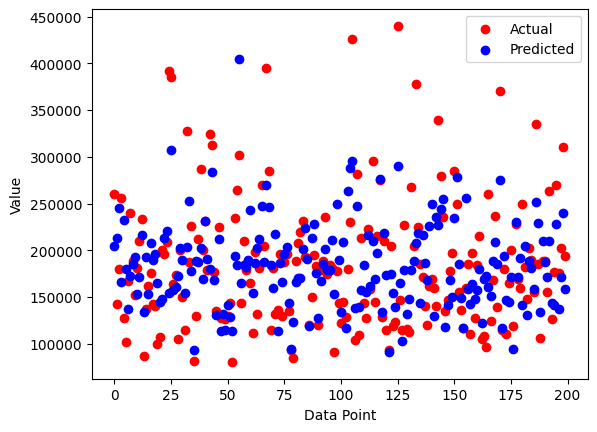

In [31]:
# Plot real values and predicted values to see if it worked
# Generate indices for the data points
indices = np.arange(len(y_train_final_25))

# Plot actual values and predicted values
plt.scatter(indices, y_train_final_25, color='red', label='Actual')
plt.scatter(indices, y_predicted, color='blue', label='Predicted')

# Set labels and legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [32]:
# Evaluate the predictions - we now compare y_25 (actual values) with y_25_predicted (predicted values)

# MSE, RMSE
mse = mean_squared_error(y_train_final_25, y_predicted)
rmse = np.sqrt(mse)

# Let's see the mean
y_predicted_mean = y_predicted.mean()

# Print the results
print('MSE:', mse)
print('RMSE:', rmse)
print('Mean:', y_predicted_mean)

MSE: 2736943208.96
RMSE: 52315.80266955674
Mean: Predicted Sale Price    183393.805
dtype: float64


In [33]:
# As I've said, we'll make this error relative to our data and then see
def calculate_normalized_rmse(y_real, y_pred):
    denominator = np.max(y_real.values) - np.min(y_real.values)
    if denominator == 0:
        return np.nan
    else:
        return np.sqrt(np.mean((y_real.values - y_pred.values) ** 2)) / denominator * 100

normalized_rmse = calculate_normalized_rmse(y_train_final_25, y_predicted)
print("Normalized RMSE:", normalized_rmse, "%")

Normalized RMSE: 14.552379045773781 %


In [34]:
# It was much better before from the RMSE point of view - well, we did one-hot encoding then (even without removing outliers); but we had 40 more features.

### Download model2 using pickle AND train dataframe as csv

In [35]:
import pickle
from google.colab import files

# Random forests

In [36]:
print(x_train_final_75.head())

           Id  MSSubClass  LotFrontage   LotArea  MasVnrArea  BsmtFinSF2  \
290  0.379381         0.0       0.7125  0.073569    0.555556         0.0   
158  0.202749         0.6       0.0875  0.044984    0.000000         0.0   
69   0.089347         0.4       0.7250  0.100773    0.686667         0.0   
517  0.657732         0.0       0.5000  0.040379    0.000000         0.0   
131  0.168385         0.0       0.6250  0.066924    0.226667         0.0   

     LowQualFinSF  BsmtHalfBath  KitchenAbvGr  Fireplaces  WoodDeckSF  \
290           0.0           0.0      0.333333    0.333333    0.197200   
158           0.0           0.0      0.333333    0.000000    0.140023   
69            0.0           0.0      0.333333    0.666667    0.122520   
517           0.0           0.0      0.333333    0.000000    0.000000   
131           0.0           0.5      0.333333    0.333333    0.229872   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
290     0.107143          

In [37]:
print(x_train_final_75.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 290 to 102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             598 non-null    float64
 1   MSSubClass     598 non-null    float64
 2   LotFrontage    598 non-null    float64
 3   LotArea        598 non-null    float64
 4   MasVnrArea     598 non-null    float64
 5   BsmtFinSF2     598 non-null    float64
 6   LowQualFinSF   598 non-null    float64
 7   BsmtHalfBath   598 non-null    float64
 8   KitchenAbvGr   598 non-null    float64
 9   Fireplaces     598 non-null    float64
 10  WoodDeckSF     598 non-null    float64
 11  OpenPorchSF    598 non-null    float64
 12  EnclosedPorch  598 non-null    float64
 13  3SsnPorch      598 non-null    float64
 14  ScreenPorch    598 non-null    float64
 15  PoolArea       598 non-null    float64
 16  MiscVal        598 non-null    float64
 17  MoSold         598 non-null    float64
 18  YrSold  

In [38]:
print(x_train_final_75.describe())  

               Id  MSSubClass  LotFrontage     LotArea  MasVnrArea  \
count  598.000000  598.000000   598.000000  598.000000  598.000000   
mean     0.501209    0.290719     0.506835    0.065230    0.201252   
std      0.288659    0.306028     0.176191    0.044081    0.278497   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.250687    0.000000     0.425000    0.045102    0.000000   
50%      0.513402    0.300000     0.487500    0.059619    0.000000   
75%      0.740378    0.400000     0.609375    0.076673    0.377222   
max      1.000000    1.000000     1.000000    0.604604    1.000000   

       BsmtFinSF2  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  Fireplaces  \
count       598.0    598.000000    598.000000    598.000000  598.000000   
mean          0.0      0.005634      0.021739      0.350613    0.202341   
std           0.0      0.063836      0.106075      0.073963    0.204477   
min           0.0      0.000000      0.000000      0.333333    0.0000

### 3d model using saleprice and the first 2 features (from coefficient)

Text(0.5, 0, 'House prices')

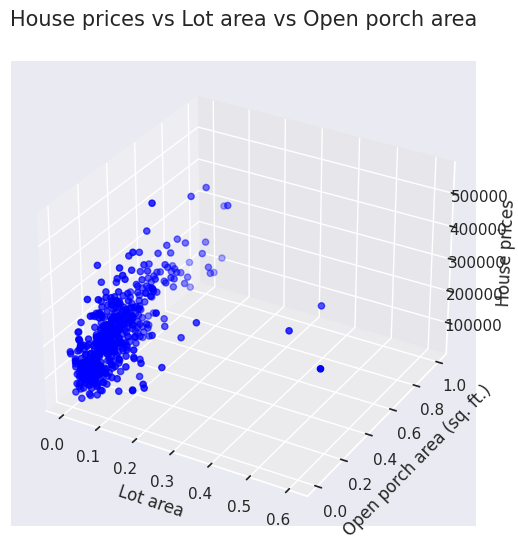

In [39]:
x_axis = x_train_final_75["LotArea"]
y_axis = x_train_final_75["OpenPorchSF"] # Terasa
z_axis = y_train_final_75

sns.set(style='darkgrid')
fig = plt.figure(figsize=(6, 9))
ax = plt.axes(projection='3d')
ax.scatter3D(x_axis, y_axis, z_axis, color='blue')
ax.set_title("House prices vs Lot area vs Open porch area", pad=25, size=15)

ax.set_xlabel('Lot area') 
ax.set_ylabel('Open porch area (sq. ft.)') 
ax.set_zlabel('House prices')

In [40]:
model_rand_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2, random_state=42) 
#n_estimators is number of trees
model_rand_forest.fit(x_train_final_75, y_train_final_75)

<ipython-input-40-93f5a7cb063b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rand_forest.fit(x_train_final_75, y_train_final_75)


RandomForestRegressor(random_state=42)

In [41]:
y_predicted_random_forests = model_rand_forest.predict(x_train_final_25)

In [42]:
type(y_predicted_random_forests)

numpy.ndarray

In [43]:
y_predicted_random_forests = y_predicted_random_forests.reshape(-1)
y_predicted_random_forests = pd.DataFrame({'Predicted Sale Price': y_predicted_random_forests.astype(int)})

In [44]:
# Show the actual values

# Show predictions and actual values
df_comparison_random_forests = pd.concat([y_predicted_random_forests, y_train_final_25], axis=1)
df_comparison_random_forests.columns = ['Predicted values (Random Forests)', 'Actual/real values']
print(df_comparison_random_forests)

     Predicted values (Random Forests)  Actual/real values
0                               162322              260000
1                               189626              143000
2                               208815              180000
3                               189080              255900
4                               192990              128000
..                                 ...                 ...
195                             249204              269500
196                             163577              176000
197                             192085              202500
198                             261495              310000
199                             188999              194000

[200 rows x 2 columns]


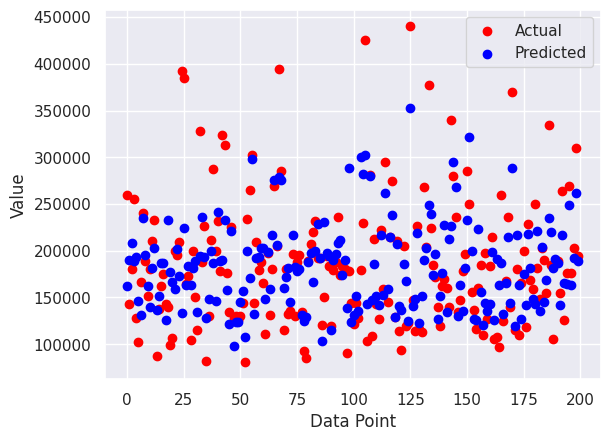

In [45]:
# Plot again actual vs predicted values
# Generate indices for the data points
indices = np.arange(len(y_train_final_25))

# Plot actual values and predicted values
plt.scatter(indices, y_train_final_25, color='red', label='Actual')
plt.scatter(indices, y_predicted_random_forests, color='blue', label='Predicted')

# Set labels and legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [46]:
# Let's see the metrics again
mse_random_forests = mean_squared_error(y_train_final_25, y_predicted_random_forests)
mae_random_forests = mean_absolute_error(y_train_final_25, y_predicted_random_forests)
rmse_random_forests = np.sqrt(mse_random_forests)
y_predicted_random_forests_mean = y_predicted_random_forests.mean().values[0]
normalized_rmse_random_forests = calculate_normalized_rmse(y_train_final_25, y_predicted_random_forests)

print('MSE Random Forests:', mse_random_forests)
print('MAE Random Forests:', mae_random_forests)
print('RMSE Random Forests:', rmse_random_forests)
print('Mean Random Forests:', y_predicted_random_forests_mean)
print("Normalized RMSE Random Forests:", normalized_rmse_random_forests, "%")

MSE Random Forests: 2410110614.83
MAE Random Forests: 34009.12
RMSE Random Forests: 49092.87743481736
Mean Random Forests: 182755.265
Normalized RMSE Random Forests: 13.655876894246832 %


In [47]:
type(y_predicted_random_forests)

pandas.core.frame.DataFrame

In [48]:
type(y_predicted_random_forests_mean)

numpy.float64

# SVM - Support Vector Machine

In [49]:
# train model: x_train_final_75, y_train_final_75
# predict values: x_train_final_25 -> we will use y_predicted_spv for storing our predicted values
# comparison of actual vs. predicted values: y_train_final_25, y_predicted_spv
# 

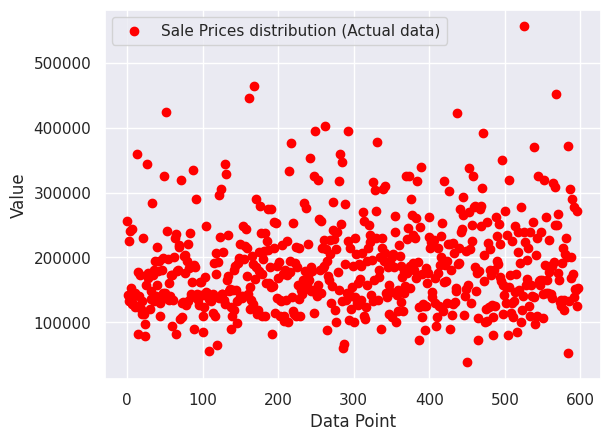

In [50]:
# Plot again actual vs predicted values
# Generate indices for the data points
indices = np.arange(len(y_train_final_75))
plt.scatter(indices, y_train_final_75, color='red', label='Sale Prices distribution (Actual data)')

# Set labels and legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [51]:
# Create an instance of SVR model
model_svm = SVR(kernel='linear', C=100000, epsilon=0.1) # Linear (most used), Polynomial (more planes / dimensions), RBF (Radial Basis Function) ("clouds"), Sigmoid (0-1)

# Train the model
model_svm.fit(x_train_final_75, y_train_final_75)

# Make predictions on the test set
y_predicted_svm = model_svm.predict(x_train_final_25)

# convert from array to Series
y_predicted_svm = y_predicted_svm.reshape(-1)
y_predicted_svm = pd.DataFrame({'Predicted Sale Price': y_predicted_svm.astype(int)})

# Show predictions and actual values
df_comparison_svm = pd.concat([y_predicted_svm, y_train_final_25], axis=1)
df_comparison_svm.columns = ['Predicted values (SVM)', 'Actual/real values']
print(df_comparison_svm)

     Predicted values (SVM)  Actual/real values
0                    189407              260000
1                    197265              143000
2                    224325              180000
3                    154804              255900
4                    239544              128000
..                      ...                 ...
195                  221820              269500
196                  138816              176000
197                  167817              202500
198                  230674              310000
199                  160834              194000

[200 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


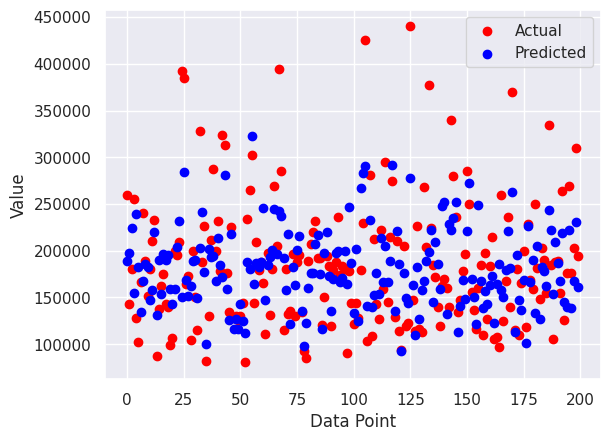

In [52]:
# Plot again actual vs predicted values
# Generate indices for the data points
indices = np.arange(len(y_train_final_25))

# Plot actual values and predicted values
plt.scatter(indices, y_train_final_25, color='red', label='Actual')
plt.scatter(indices, y_predicted_svm, color='blue', label='Predicted')

# Set labels and legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [53]:
# Evaluate the model
mse_svm = mean_squared_error(y_train_final_25, y_predicted_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_train_final_25, y_predicted_svm)

# Print the evaluation metrics
print("MSE SVM:", mse_svm)
print('RMSE SVM:', rmse_svm)
print("R-squared SVM:", r2_svm)

MSE SVM: 2895392741.14
RMSE SVM: 53808.85374304121
R-squared SVM: 0.3857151057877456


In [54]:
# Change in C (regularization parameter) - RESULTS
# NOTE: R SQUARED MUST BE POSITIVE, otherwise we have a problem

# EPSILON = 0.1
# 0.1: r squared is -0.0222
# 1 / 2: r squared is -0.0217
# 10: r squared is -0.0195
# 50: r squared is -0.0079
# 100: r squared is 0.008969
# 500: r is 0.1
# 1.000: r is 0.1863
# 5.000: r is 0.33966
# 10.000: r is 0.37119
# 50.000: r is 0.38363
# 100.000: r is 0.3857

# Interpretation: An R^2 of 0.3857 means that about 38.57% of the total variance of our target variable (y) can be explained by our predictors (x) 
# The rest (very large - 61.43%) cannot be explained using our model

In [55]:
# Case: Overpriced vs Undervalued houses - getting good deals and avoiding scams
good_bad_deals_regression = pd.DataFrame(df_comparison["Predicted values"] - df_comparison["Actual/real values"], columns=["Gap (Regression)"])

# Sort by largest gap (+/-)
#good_bad_deals_regression = good_bad_deals_regression.sort_values(by="Gap", ascending=False)

#print("Good deals / Steals:")
#print(good_bad_deals_regression[0:10])

#print("Bad deals / Scams:")
#print(good_bad_deals_regression[189:200])

In [56]:
# Case: Overpriced vs Undervalued houses - getting good deals and avoiding scams
good_bad_deals_random_forests = pd.DataFrame(df_comparison_random_forests["Predicted values (Random Forests)"] - df_comparison_random_forests["Actual/real values"], columns=["Gap (Random Forests)"])

# Sort by largest gap (+/-)
#good_bad_deals_random_forests = good_bad_deals_random_forests.sort_values(by="Gap", ascending=False)

#print("Good deals / Steals:")
#print(good_bad_deals_random_forests[0:10])

#print("Bad deals / Scams:")
#print(good_bad_deals_random_forests[189:200])

In [57]:
# Case: Overpriced vs Undervalued houses - getting good deals and avoiding scams
good_bad_deals_svm = pd.DataFrame(df_comparison_svm["Predicted values (SVM)"] - df_comparison_svm["Actual/real values"], columns=["Gap (SVM)"])

# Sort by largest gap (+/-)
#good_bad_deals_svm = good_bad_deals_svm.sort_values(by="Gap", ascending=False)

#print("Good deals / Steals:")
#print(good_bad_deals_svm[0:10])

#print("Bad deals / Scams:")
#print(good_bad_deals_svm[189:200])

In [58]:
# All +/- values for each of the 3 models
good_bad_deals_all = pd.concat([good_bad_deals_regression, good_bad_deals_random_forests, good_bad_deals_svm], axis=1)
print(good_bad_deals_all)

     Gap (Regression)  Gap (Random Forests)  Gap (SVM)
0              -55779                -97678     -70593
1               69664                 46626      54265
2               65186                 28815      44325
3              -90098                -66820    -101096
4              104378                 64990     111544
..                ...                   ...        ...
195            -41696                -20296     -47680
196            -39303                -12423     -37184
197            -31486                -10415     -34683
198            -70495                -48505     -79326
199            -35120                 -5001     -33166

[200 rows x 3 columns]


In [59]:
# Sort by largest gap (+/-)
good_bad_deals_all = good_bad_deals_all.sort_values(by="Gap (Random Forests)", ascending=False)

print("Good deals / Steals:")
print(good_bad_deals_all[0:10])

print("\nBad deals / Scams:")
print(good_bad_deals_all[189:200])

Good deals / Steals:
     Gap (Regression)  Gap (Random Forests)  Gap (SVM)
103             83979                120357      87172
98              71888                110836      68684
18              56382                 93166      55626
163             61363                 83022      56396
87              63330                 80764      47335
19              65849                 78289      59631
188             27402                 75069      47973
142             95203                 73093      88745
151             28795                 71203      22266
164             75603                 66426      89225

Bad deals / Scams:
     Gap (Regression)  Gap (Random Forests)  Gap (SVM)
38             -85067                -99937     -93085
186            -83412               -100009     -90934
180           -108675               -107187    -116784
143           -113067               -113345    -118025
67            -124503               -115925    -152268
105           -130736   

In [60]:
# Download the models on local machine
#with open('model.pkl', 'wb') as file:
#    pickle.dump(model, file)

#files.download('model.pkl')

# Download the datasets - x_train_final_75, y_train_final_75 (train) and x_train_final_25 (predict)
x_train_final_75.to_csv('x_train_final_75.csv', index=False)
files.download('x_train_final_75.csv')

y_train_final_75.to_csv('y_train_final_75.csv', index=False)
files.download('y_train_final_75.csv')

x_train_final_25.to_csv('x_train_final_25.csv', index=False)
files.download('x_train_final_25.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clustering

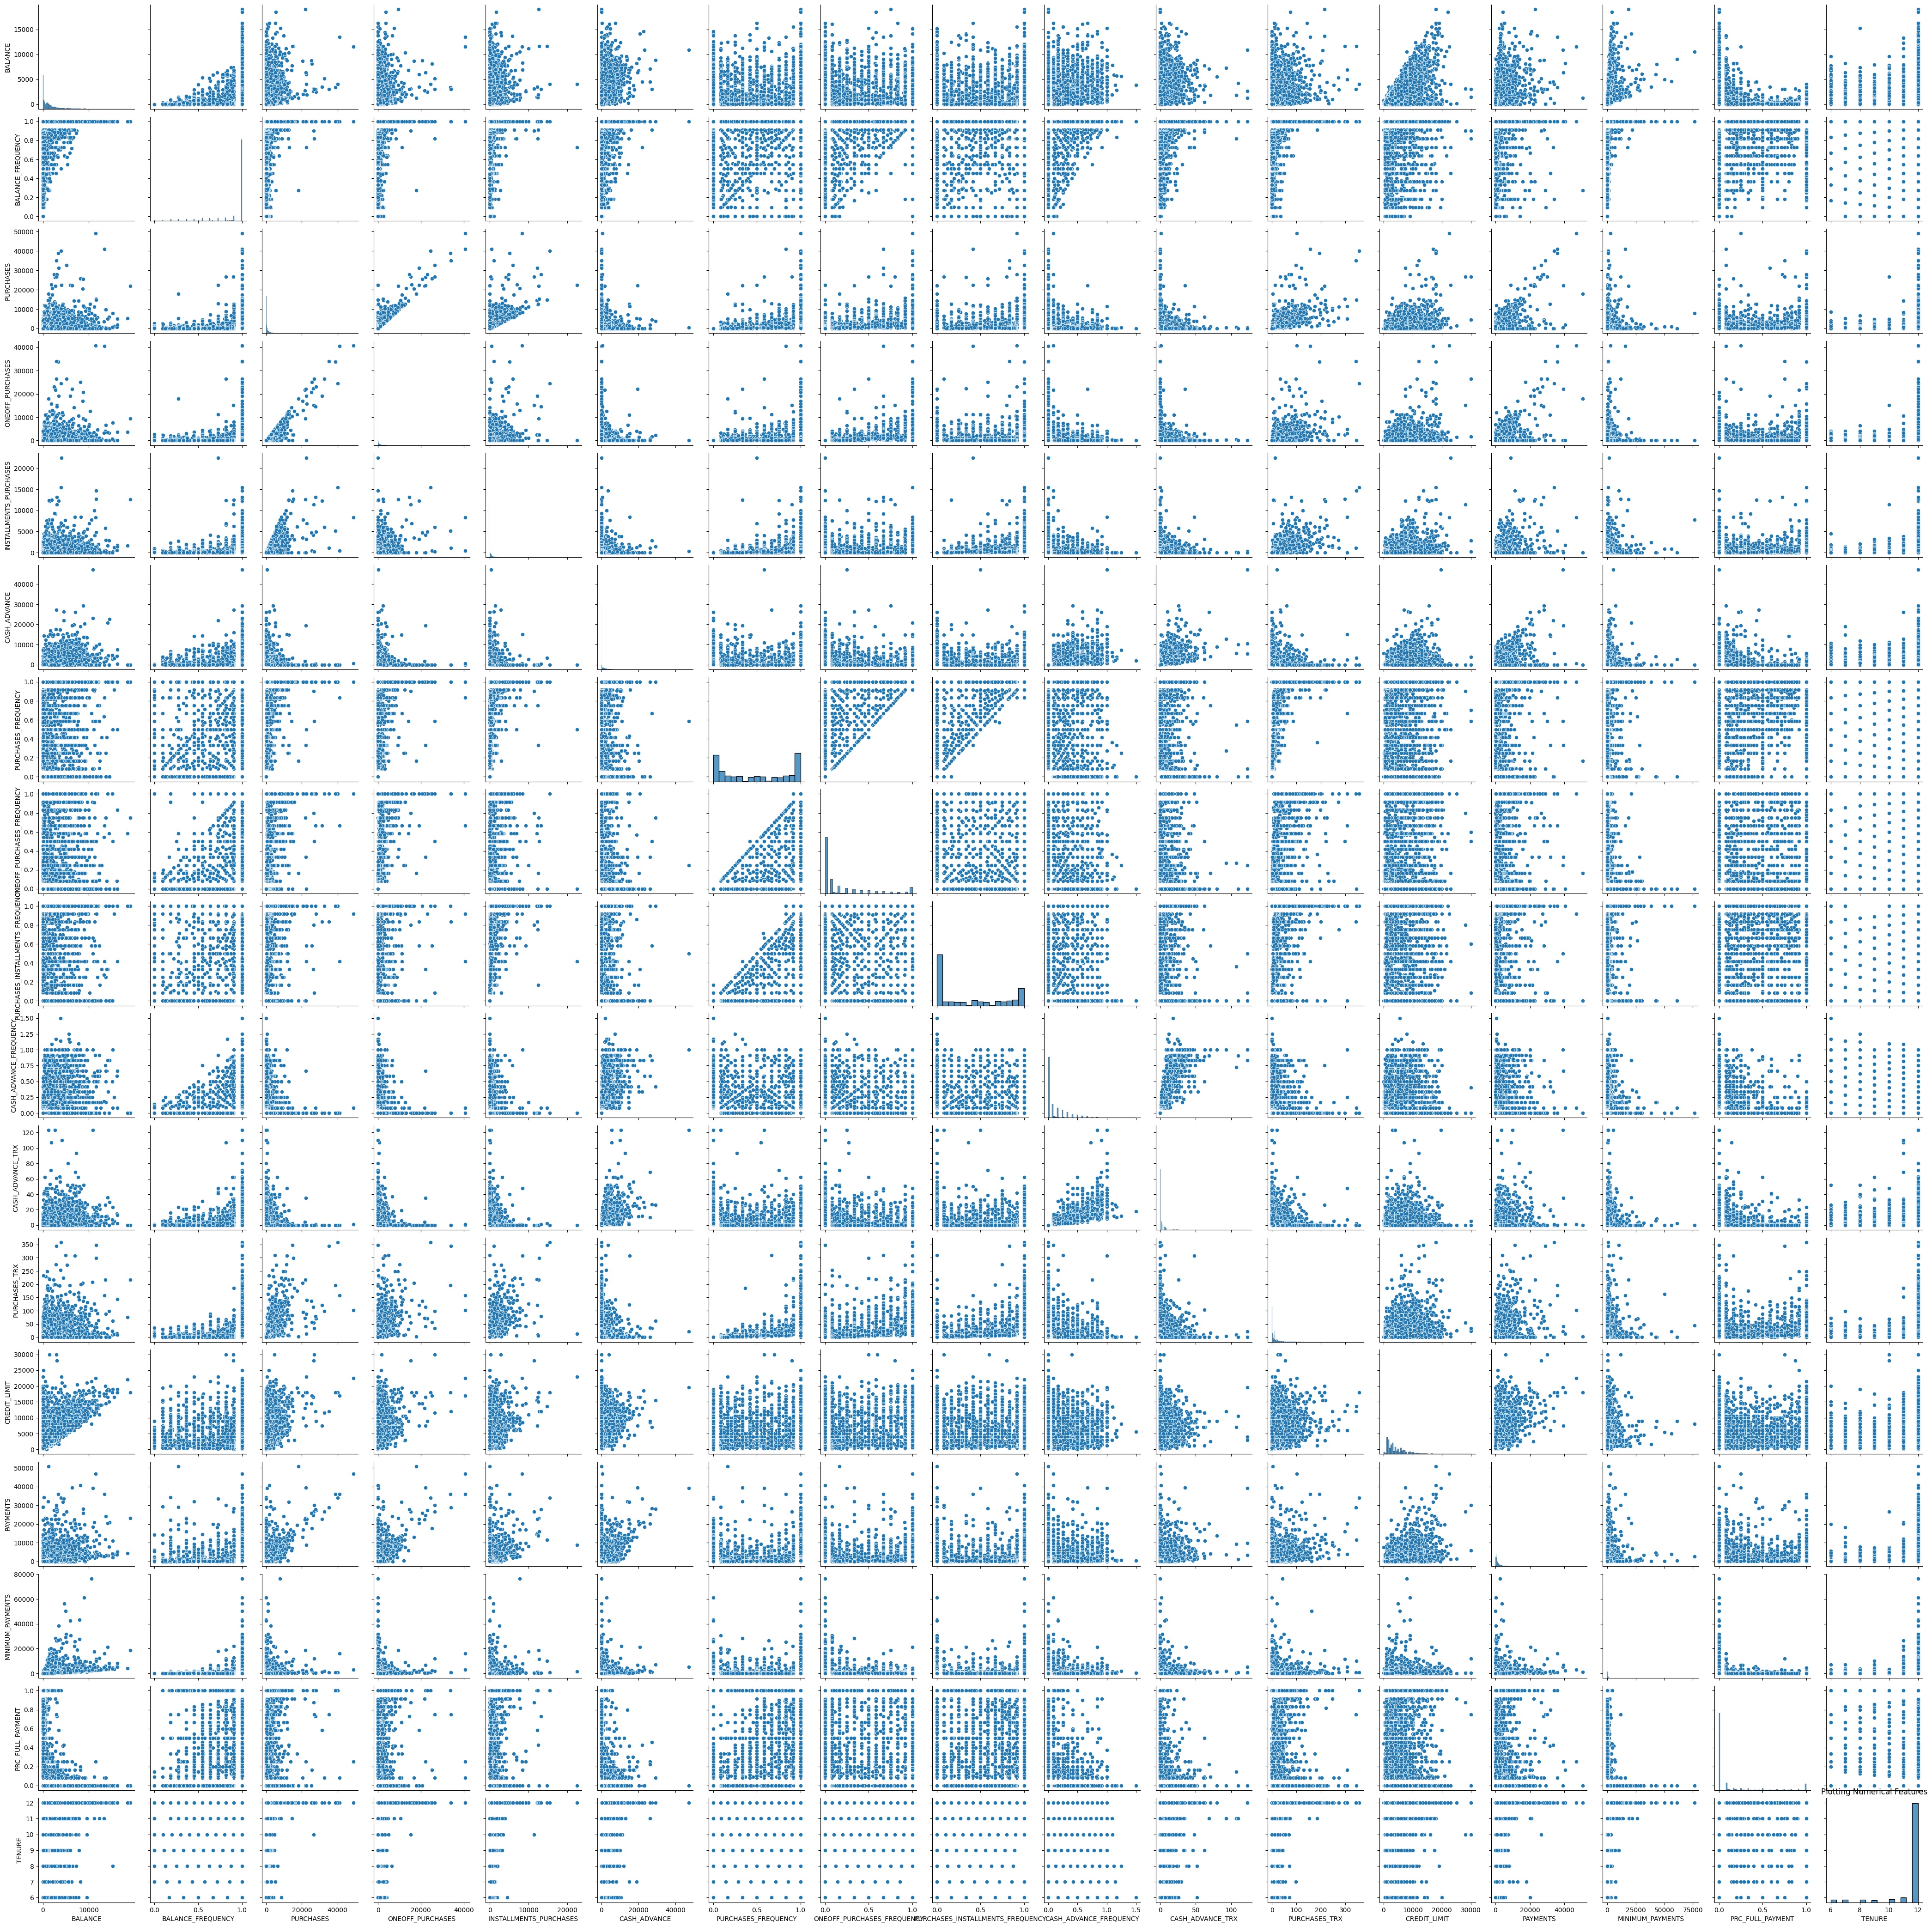

In [ ]:
#Clustering 1 - Credit Card transactions

# 1. PLotting the numerical features
sns.pairplot(df_clustering.select_dtypes(include=[np.number])) #takes a sub data frame that only contains numerical attributes
plt.title('Plotting Numerical Features')
plt.show()

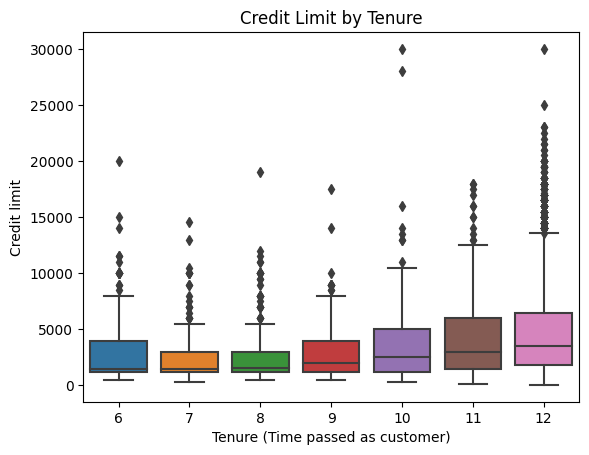

In [ ]:
# 2. Boxplot of Credit limit by Tenure
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=df_clustering)
plt.title('Credit Limit by Tenure')
plt.xlabel('Tenure (Time passed as customer)')
plt.ylabel('Credit limit')
plt.show()

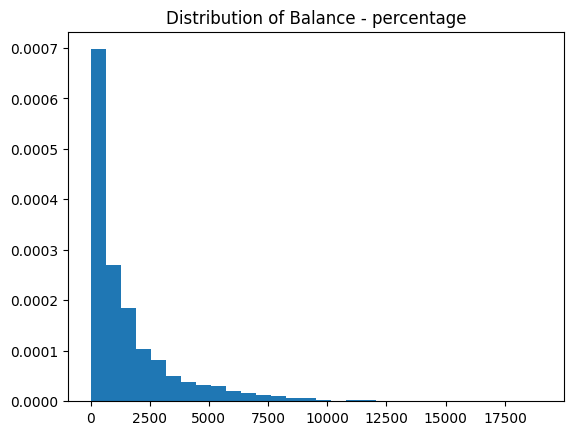

In [ ]:
# 3.1 Histogram of Balance (percentage)
plt.hist(df_clustering['BALANCE'], bins=30, density=True) #bins - equal "bags" (intervals) in our range - for example, in the interval 1-99, if we have 3 bins, 1st will be 1-33, 2nd 34-66, 3rd 67-99.
plt.title('Distribution of Balance - percentage')
plt.show()

# We see that a lot of people have a balance of 0 

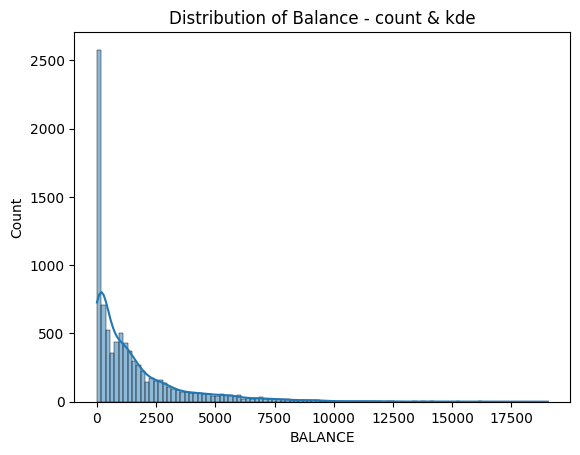

In [ ]:
# 3.1 Histogram of Balance (count) and KDE included (Kernel Density Estimation)
sns.histplot(df_clustering['BALANCE'], kde=True)
plt.title('Distribution of Balance - count & kde')
plt.show()

In [ ]:
# Data cleaning
# Drop columns with too many missing values and fill the rest with the median
df_clustering = df_clustering.drop(['CUST_ID'], axis=1)
df_clustering = df_clustering.fillna(df_clustering.median())

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Import csv, replace NaN values, replace missing values with mean, eliminate Custid due to only attribute that is not of type number.
creditcard_df = pd.read_csv('/content/sample_data/CC GENERAL.csv')
creditcard_df.isnull().sum()
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.drop(('CUST_ID'), axis = 1, inplace = True)

#print(creditcard_df['MINIMUM_PAYMENTS'].value_counts())
#creditcard_df.isna().sum().sum()
nan_indices = creditcard_df[creditcard_df['MINIMUM_PAYMENTS'].isnull()].index
print(nan_indices)

Int64Index([], dtype='int64')


In [ ]:
#Check for NaN values
nan_values = creditcard_df.isna()
nan_rows = creditcard_df[nan_values.any(axis=1)]
nan_columns = creditcard_df.columns[nan_values.any(axis=0)]

print("Rows with NaN values:")
print(nan_rows)

print("Columns with NaN values:")
print(nan_columns)

Rows with NaN values:
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []
Columns with NaN values:
Index([], dtype='object')


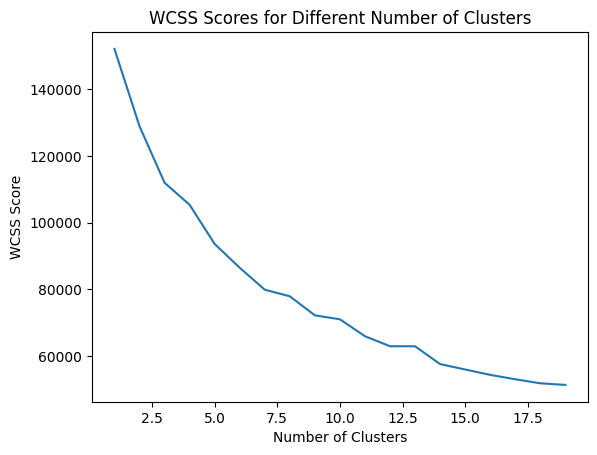

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i, n_init = "auto")
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)
# "Elbow" method - we pick the optimal number of clusters where the trend line starts to decrease linearly
plt.plot(range(1, 20), score_1)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score') #Within cluster sum of squares
plt.title('WCSS Scores for Different Number of Clusters')
plt.show()


In [ ]:
# As we can see, the "elbow" forms at 7-8 clusters - closer to 8 if we notice the very small abrupt curve

[2 1 4 ... 6 6 6]


Text(0, 0.5, 'Balance')

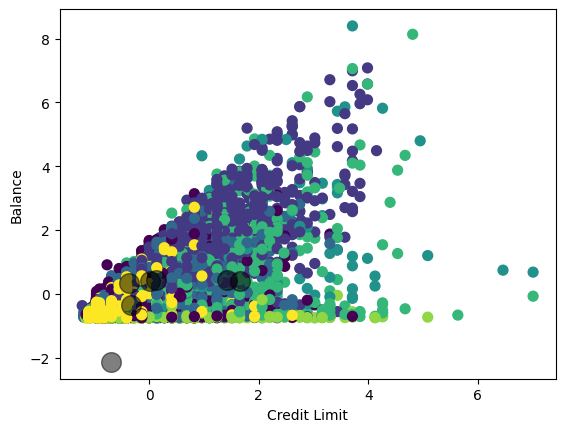

In [ ]:
# Performs KMeans using 7 clusters (optimal number), n_init means how many times we start our computation using different cluster centeroids, max 300 iterations.
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_df_scaled)
print(labels)

plt.scatter(creditcard_df_scaled[:, 12], creditcard_df_scaled[:, 0], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Credit Limit')
plt.ylabel('Balance')

Explained Variance ratio (first two components): [0.27290063 0.20301984]
Explained Variance ratio (first two components): [0.27290063 0.20301984 0.08792139]


Text(0, 0.5, 'Cumulative Explained Variance (%)')

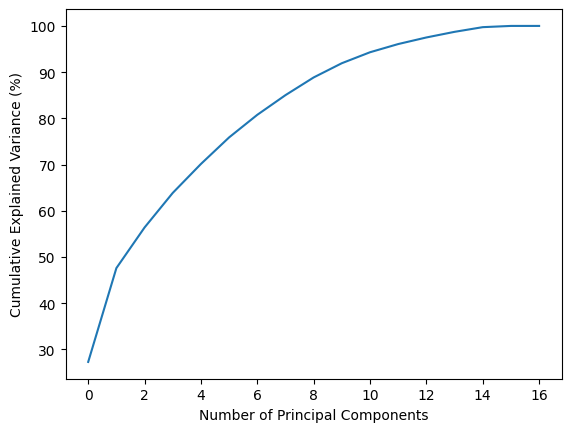

In [ ]:
# Principal component analysis
pca2 = PCA(n_components = 2)
principal_comp = pca2.fit_transform(creditcard_df_scaled)
print("Explained Variance ratio (first two components): %s"% str(pca2.explained_variance_ratio_))

pca3 = PCA(n_components = 3)
principal_comp = pca3.fit_transform(creditcard_df_scaled)
print("Explained Variance ratio (first two components): %s"% str(pca3.explained_variance_ratio_))

pca_plot = PCA().fit(creditcard_df_scaled)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_)*100)
plt.xlabel("Number of Principal Components")
#plt.xscale("log")
plt.ylabel("Cumulative Explained Variance (%)")

In [ ]:
df_tenure = creditcard_df["TENURE"]
print(df_tenure)

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64


In [ ]:
import plotly.express as px

pca = PCA()
components = pca.fit_transform(creditcard_df_scaled)
labels = {
    str(i): f"PC {i+1} ( {var:.1f}%)" 
          for i, var in enumerate(pca.explained_variance_ratio_*100)
}
fig = px.scatter_matrix(components, labels = labels, dimensions = range(5), width = 1400, height = 1050, color = df_tenure)
fig.update_traces(diagonal_visible = False)

for annotation in fig['layout']["annotations"]:
  annotation["textangle"] = 0

fig.show()

In [ ]:
pca_3 = PCA(n_components = 3, random_state = 0)
pca_data = pca_3.fit_transform(creditcard_df_scaled)
print(pca_3.explained_variance_ratio_)
print(pca_3.explained_variance_ratio_.sum())
total_var = pca_3.explained_variance_ratio_.sum()*100
fig = px.scatter_3d(pca_data, x = 0, y= 1, z = 2, color = df_tenure, title = f"Total explained variance: {total_var:.2f}%", labels = {"0": "PC1", "1": "PC2", "2": "PC3"})

fig.show()

[0.27290063 0.20301984 0.08792139]
0.5638418575320674


## t-SNE (T Distributed Stochastic Neighboring Embeddings)

t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

Revealing the structure at many scales on a single map

Revealing data that lie in multiple, different, manifolds or clusters

Reducing the tendency to crowd points together at the center

Text(-100, 40, '12 years')

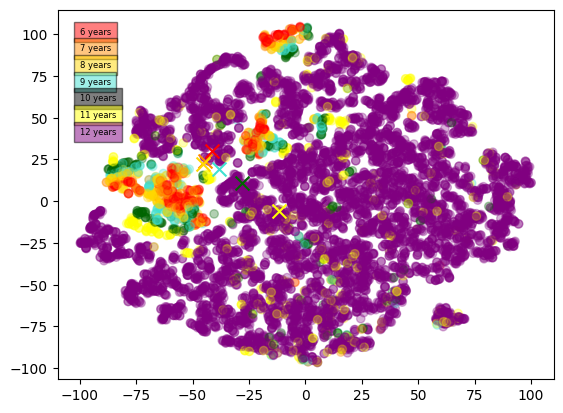

In [ ]:
#T Distributed Stochastic Neighboring Embeddings
from sklearn.manifold import TSNE 
import matplotlib 

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(creditcard_df_scaled)
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen", "yellow", "purple"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df_tenure.values-6

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4,5,6]:
  avg_x = np.array(x)[df_tenure==score+6].mean()
  avg_y = np.array(y)[df_tenure==score+6].mean()
  color = colors[score]
  plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.text(-100, 100, "6 years", fontsize = 6, bbox = dict(facecolor = 'red', alpha = 0.5))
plt.text(-100, 90, "7 years", fontsize = 6, bbox = dict(facecolor = 'darkorange', alpha = 0.5))
plt.text(-100, 80, "8 years", fontsize = 6, bbox = dict(facecolor = 'gold', alpha = 0.5))
plt.text(-100, 70, "9 years", fontsize = 6, bbox = dict(facecolor = 'turquoise', alpha = 0.5))
plt.text(-100, 60, "10 years", fontsize = 6, bbox = dict(facecolor = 'black', alpha = 0.5))
plt.text(-100, 50, "11 years", fontsize = 6, bbox = dict(facecolor = 'yellow', alpha = 0.5))
plt.text(-100, 40, "12 years", fontsize = 6, bbox = dict(facecolor = 'purple', alpha = 0.5))

Now we will try to see if the dimensionality reductrion helps us to make 7 clusters which would mean predicting the tenure of our clients. Based on the variance plot we will reduce the dimensionality to 6 (about 80% explainability)

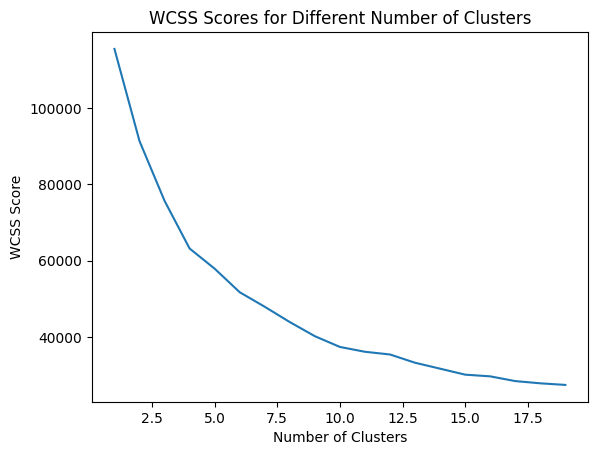

In [ ]:
pca_6 = PCA(n_components = 6, random_state = 0)
pca_6_tr = pca_6.fit_transform(creditcard_df_scaled)
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i, n_init = "auto")
    kmeans.fit(pca_6_tr)
    score_1.append(kmeans.inertia_)
# "Elbow" method - we pick the optimal number of clusters where the trend line starts to decrease linearly
plt.plot(range(1, 20), score_1)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score') #Within cluster sum of squares
plt.title('WCSS Scores for Different Number of Clusters')
plt.show()

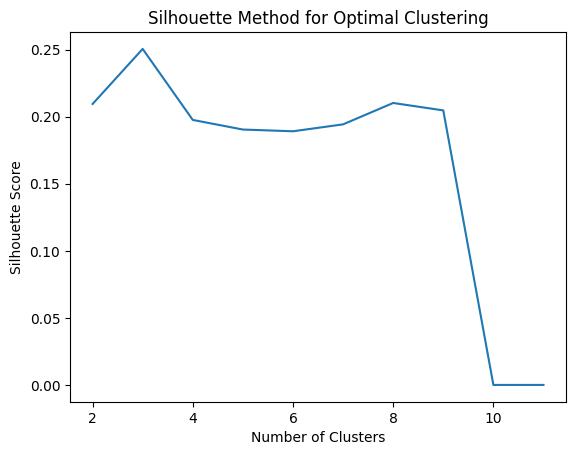

In [ ]:
max_clusters = 10
silhouette_scores = np.zeros(max_clusters)

# Iterate over different numbers of clusters
for n_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init = "auto", random_state=0)
    labels = kmeans.fit_predict(creditcard_df_scaled)
    silhouette_scores[n_clusters-2] = silhouette_score(creditcard_df_scaled, labels)

# Plot silhouette scores
plt.plot(range(2, max_clusters+2), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Clustering')
plt.show()

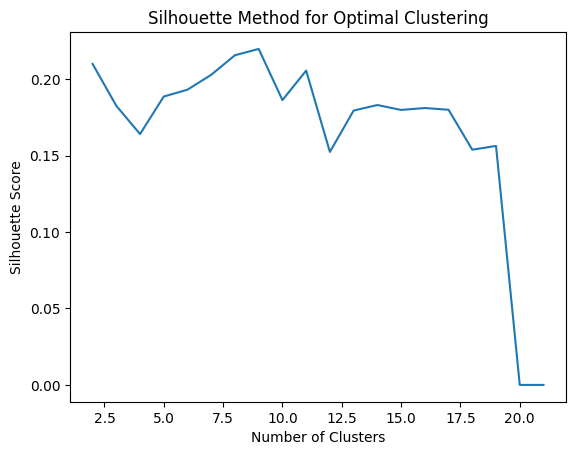

In [ ]:
max_clusters = 20
silhouette_scores = np.zeros(max_clusters)

# Iterate over different numbers of clusters
for n_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init = "auto", random_state=0)
    labels = kmeans.fit_predict(pca_6_tr)
    silhouette_scores[n_clusters-2] = silhouette_score(creditcard_df_scaled, labels)

# Plot silhouette scores
plt.plot(range(2, max_clusters+2), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Clustering')
plt.show()

In [ ]:
vis_dims

array([[-45.93715  ,  33.18951  ],
       [-13.0233965, -61.30858  ],
       [ 38.89793  , -20.505238 ],
       ...,
       [-20.16414  ,  45.1528   ],
       [-60.929333 ,   6.198085 ],
       [-58.033833 ,  13.938967 ]], dtype=float32)

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
import seaborn as sns
clustering = DBSCAN(eps=5, min_samples=5).fit(vis_dims)
vis_dims_df = pd.DataFrame(vis_dims, columns = ["Dimension_1", "Dimension_2"])
DBSCAN_dataset = vis_dims_df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 
DBSCAN_dataset.Cluster.value_counts().to_frame()


Cluster
 0     8373
 1      256
 4      141
 2       92
 3       67
 5       17
-1        4

In [ ]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
outliers

Dimension_1  Dimension_2  Cluster
2266   -40.423931    -7.582305       -1
2835   -30.014265    22.931549       -1
6110   -29.997839    22.921621       -1
6741   -29.996147    22.944839       -1

## DBSCAN (Density-based spatial clustering of applications with noise)

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

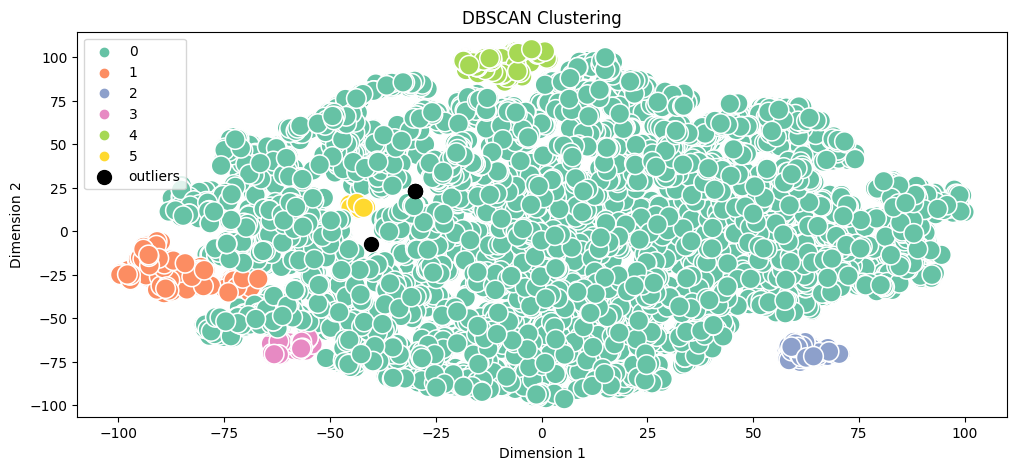

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.scatterplot(x = 'Dimension_1', y = 'Dimension_2',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set2', legend='full', s=200, ax=ax)
# Scatter plot for outliers
ax.scatter(outliers['Dimension_1'], outliers['Dimension_2'], s=100, label='outliers', c="k")

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('DBSCAN Clustering')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
tenure_counts = creditcard_df['TENURE'].value_counts()
tenure_counts

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64